## Load libraries

In [284]:
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [285]:
import hw

## Explore cropped data

In [286]:
cropped_data_dir = 'data/CroppedYale/'
cropped = hw.LoadCropped(cropped_data_dir)

In [287]:
image_count = []
for i in cropped.faces:
    image_count.append(len(i.T))

## Count images per subject

In [288]:
np.array(image_count).min()

59

In [289]:
np.array(image_count).max()

64

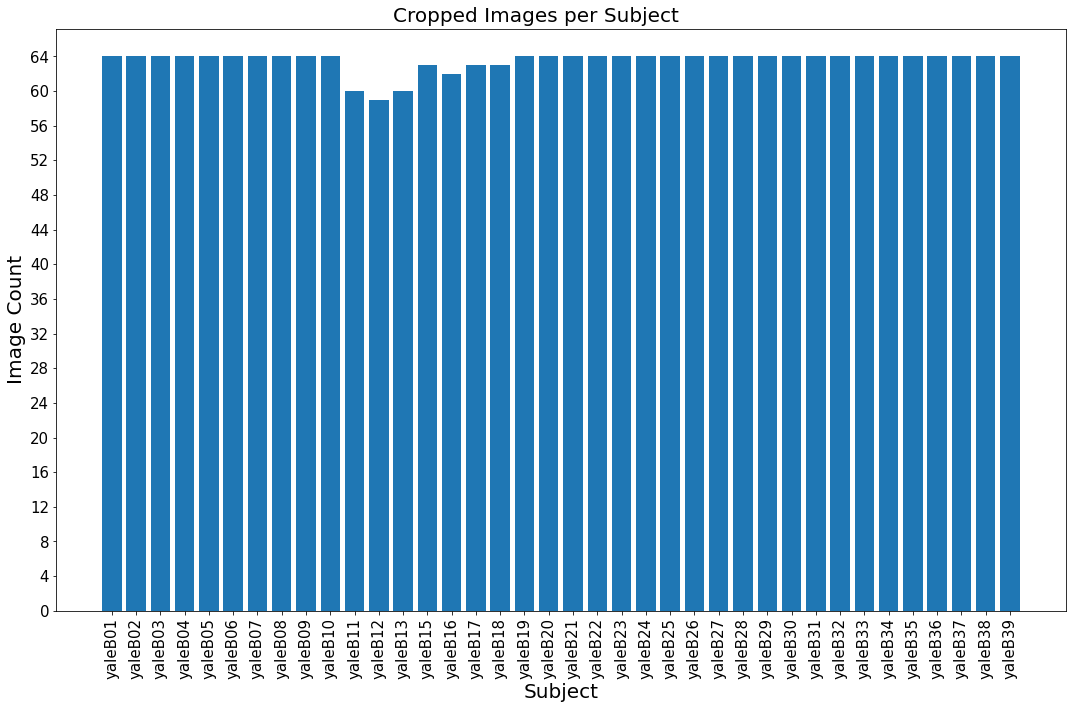

In [290]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(cropped.target_names, image_count)
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Subject', fontsize=20)
ax.set_ylabel('Image Count', fontsize=20)
ax.xaxis.set_ticks(np.arange(len(image_count)))
ax.yaxis.set_ticks(np.arange(max(image_count)+1)[::4])
fig.suptitle('Cropped Images per Subject', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/cropped_images_bar_chart.png');

## Plot first image per subject

In [291]:
face_images_list = hw.get_first_face_per_dir(cropped.face_dirs)
image_arrays = hw.load_images(face_images_list)

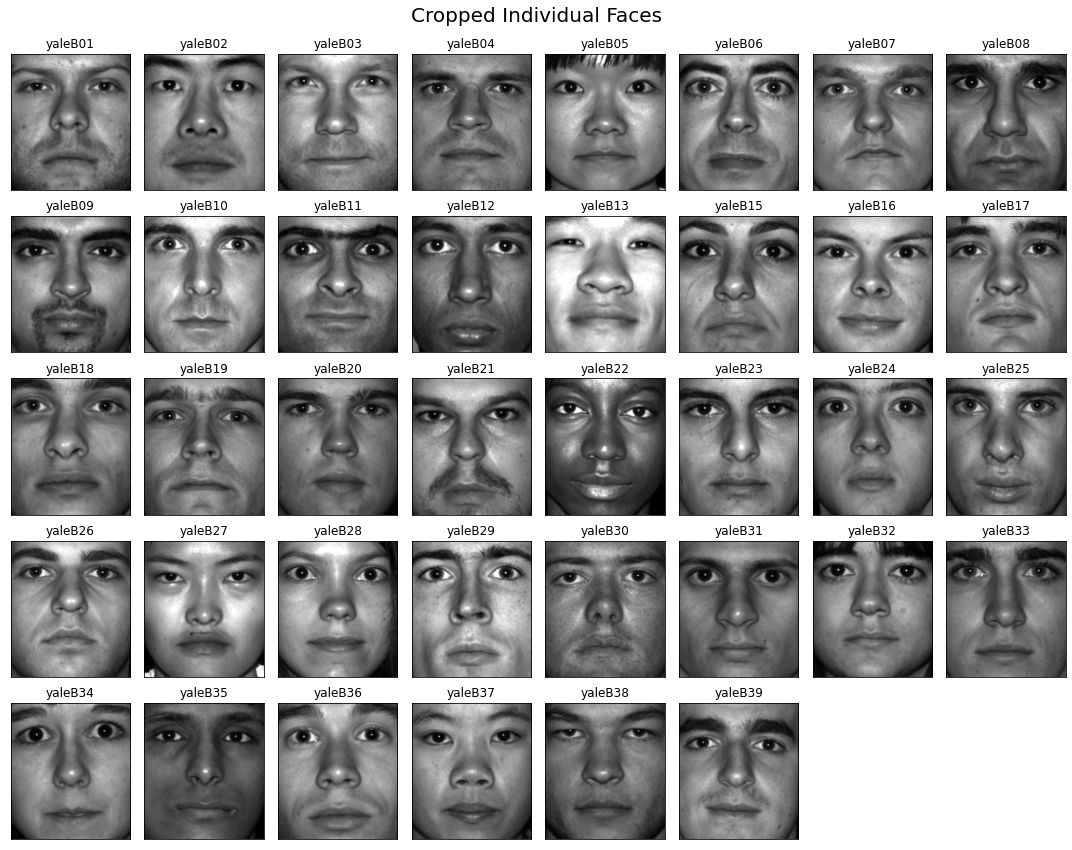

In [292]:
hw.plot_images_subset(image_arrays,
                       rows = 5,
                       columns = 8,
                       figsize= (15,12),
                       labels = cropped.target_names)
plt.suptitle('Cropped Individual Faces', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93);
plt.savefig('plots/exploration/cropped_images.png');

## Plot different lighting conditions

In [293]:
conditions = []
for i in cropped.all_file_names:
    c = os.path.split(i)[-1].split('_')[-1].split('.')[0]
    conditions.append(c)

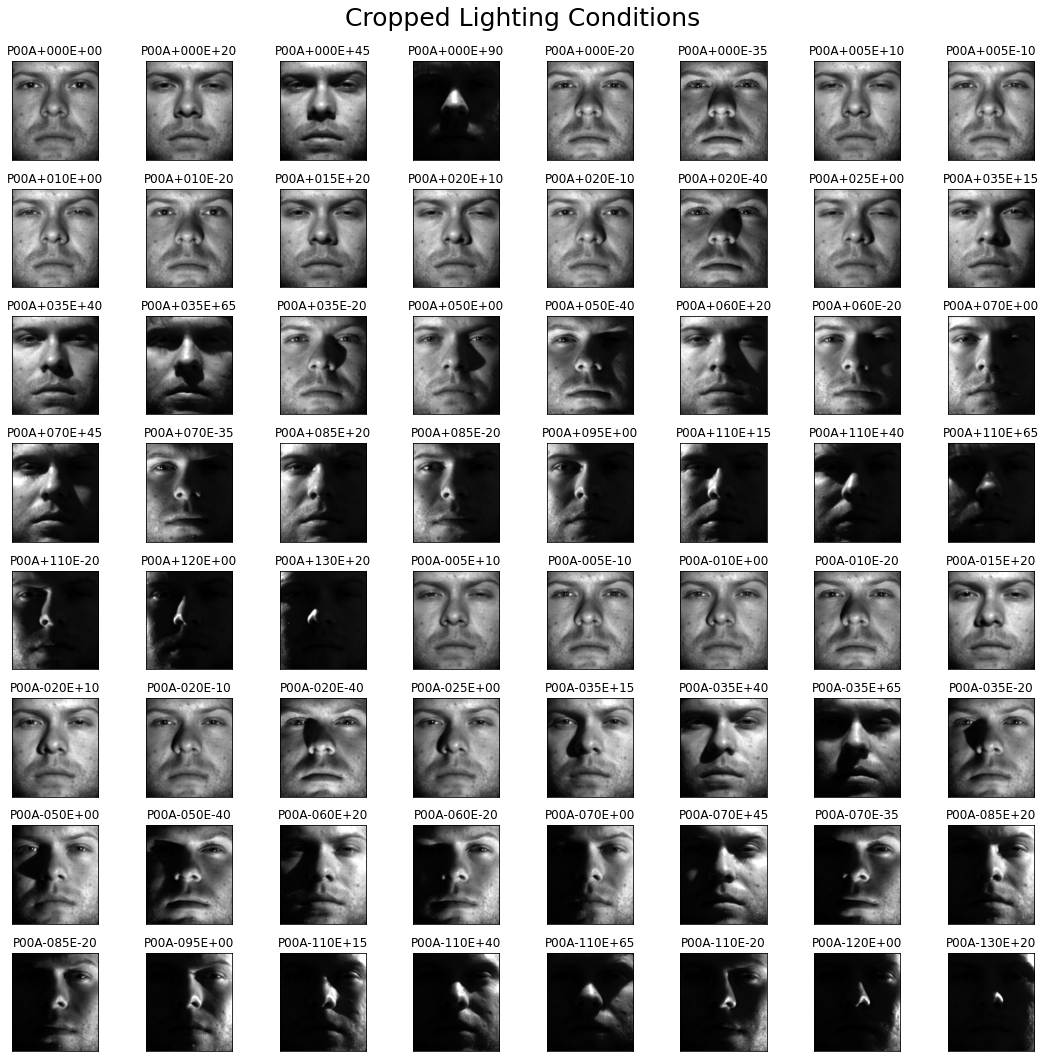

In [294]:
hw.plot_images_subset(cropped.X,
                      rows = 8,
                      columns = 8,
                      figsize= (15,15),
                      labels = conditions,
                      reshape = (cropped.h,cropped.w))

plt.suptitle('Cropped Lighting Conditions', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('plots/exploration/cropped_lighting.png');

## SVD

In [710]:
U,S,VT = np.linalg.svd(cropped.X.T,full_matrices=0) 

### Modes necessary to explain 99% of the data

In [711]:
var_explained = np.round(S**2/np.sum(S**2), decimals=100)
thresh = 0.99
cdf=np.cumsum(var_explained)
n_components = np.where(cdf>thresh)[0][0]
n_components

139

In [712]:
n_components / len(cdf)

0.05758077879038939

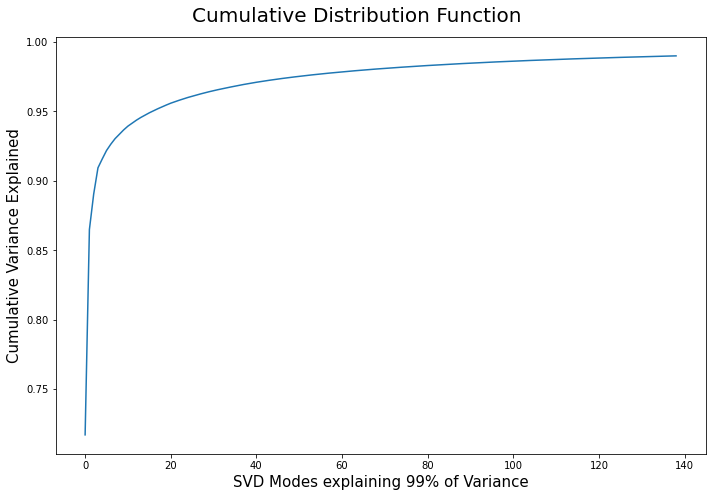

In [677]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.cumsum(var_explained[:n_components]))
ax.set_xlabel('SVD Modes explaining 99% of Variance', fontsize=15)
ax.set_ylabel('Cumulative Variance Explained', fontsize=15)
fig.suptitle('Cumulative Distribution Function', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/cropped_cdf_svd_modes.png');

### Dominant SVD modes

In [713]:
var_explained = np.round(S**2/np.sum(S**2), decimals=2)
var_explained = var_explained[var_explained >= 0.01]

In [714]:
np.sum(var_explained)

0.9400000000000001

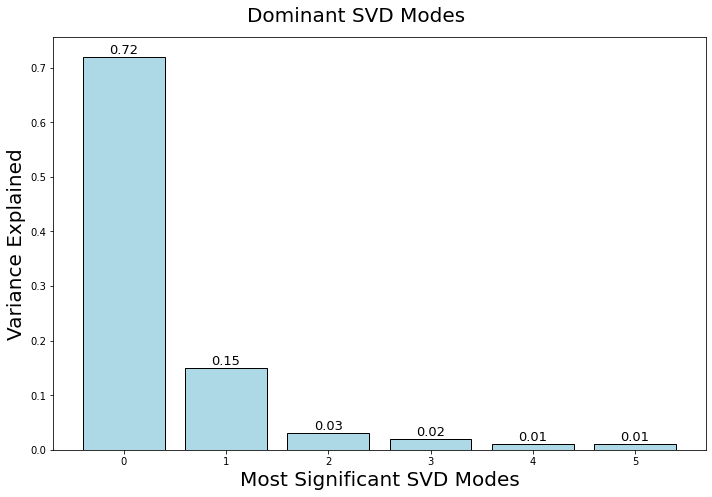

In [680]:
fig, ax = plt.subplots(figsize=(10,7))
bar_plot = ax.bar(np.arange(len(var_explained)), var_explained, color="lightblue", ec='k')

for p in bar_plot.patches:
    width = p.get_width()
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height()+0.001, 
            np.round(p.get_height(), 2), 
            fontsize=13, color='k', ha='center', va='bottom')
    
    
ax.set_xlabel('Most Significant SVD Modes', fontsize=20)
ax.set_ylabel('Variance Explained', fontsize=20)

fig.suptitle('Dominant SVD Modes', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/cropped_svd_modes.png');

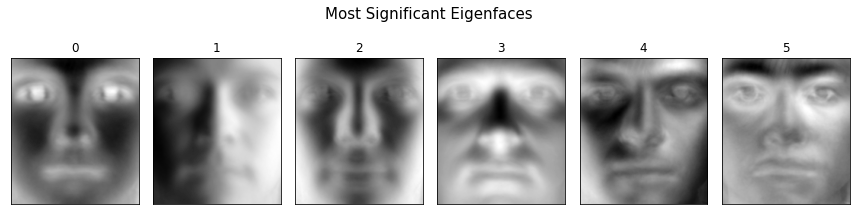

In [692]:
hw.plot_images_subset(U.T,
                      rows = 1,
                      columns = 6,
                      figsize= (12,10),
                      reshape = (cropped.h,cropped.w),
                      labels = np.arange(6))

plt.suptitle('Most Significant Eigenfaces', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.6)
plt.savefig('plots/exploration/cropped_svd_eigenfaces.png');

## Reconstruction

In [682]:
step = np.arange(10,170,10)

In [644]:
stack = []
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ cropped.X[:1].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)

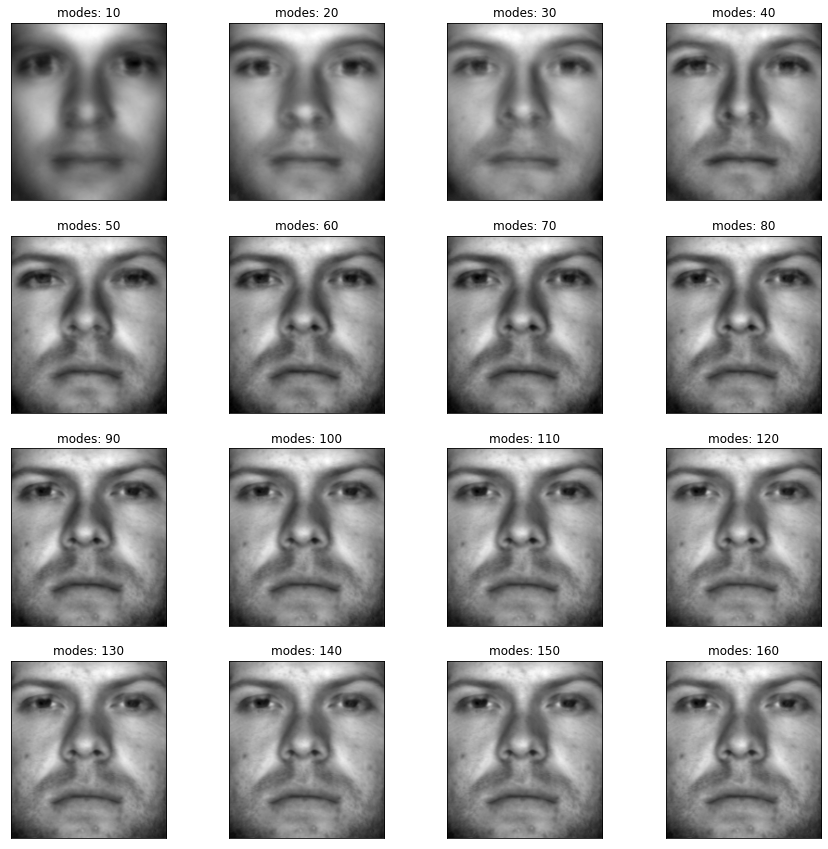

In [645]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (cropped.h,cropped.w),
                      labels = labels)

plt.savefig('plots/exploration/cropped_svd_modes_1.png');

In [646]:
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ cropped.X[:30].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)


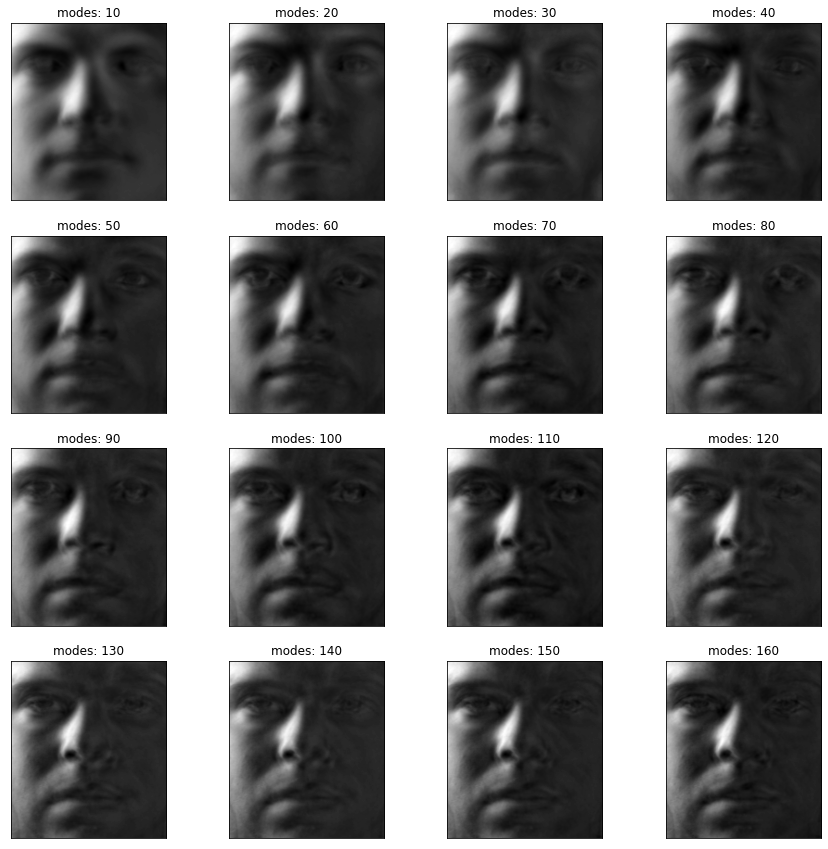

In [647]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (cropped.h,cropped.w),
                      labels = labels)

plt.savefig('plots/exploration/cropped_svd_modes_2.png');

## Explore uncropped data

In [547]:
uncropped_data_dir = 'data/yalefaces_uncropped/yalefaces/'

In [548]:
uncropped = hw.LoadUncropped(uncropped_data_dir)

In [549]:
subject_id = []
conditions = []
for i in uncropped.all_file_names:
    a,b = os.path.split(i)[-1].split('.')
    subject_id.append(a)
    conditions.append(b)

## Count images per subject

In [550]:
len(Counter(subject_id).keys())

15

In [551]:
Counter(subject_id)

Counter({'subject01': 11,
         'subject02': 11,
         'subject03': 11,
         'subject04': 11,
         'subject05': 11,
         'subject06': 11,
         'subject07': 11,
         'subject08': 11,
         'subject09': 11,
         'subject10': 11,
         'subject11': 11,
         'subject12': 11,
         'subject13': 11,
         'subject14': 11,
         'subject15': 11})

In [552]:
image_count = list(Counter(subject_id).values())

In [553]:
ids = []
for i in list(Counter(subject_id).keys()):
    ids.append(i[-2:])

In [554]:
n_components = len(var_explained[var_explained > 0.001])
n_components

139

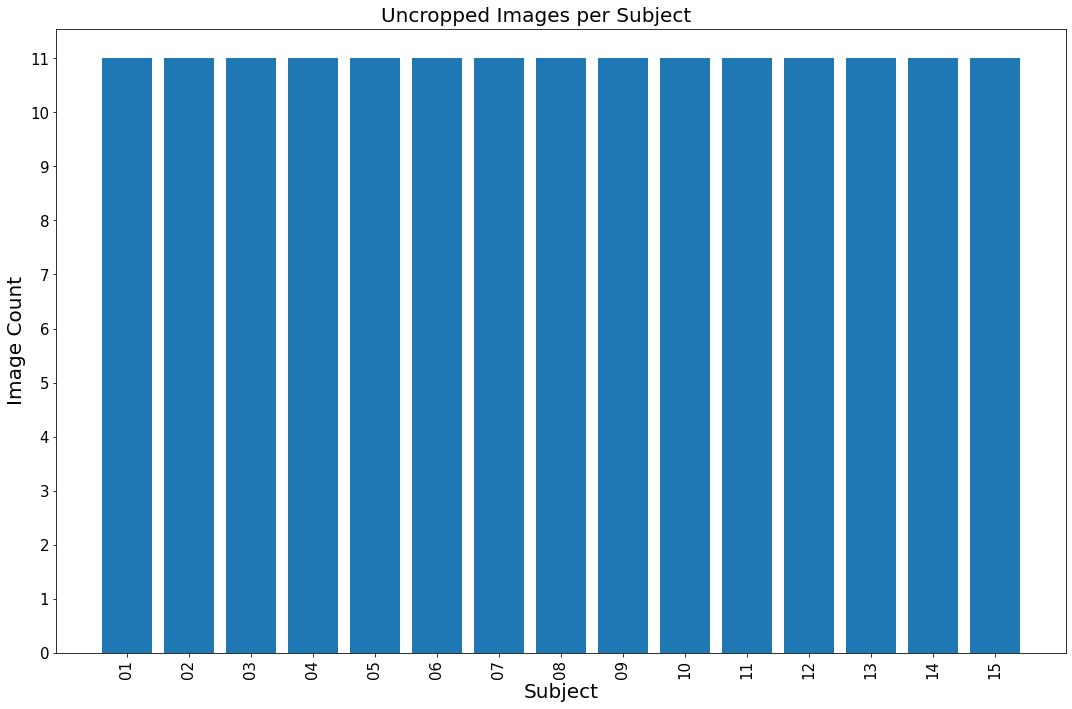

In [555]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(ids, image_count)
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Subject', fontsize=20)
ax.set_ylabel('Image Count', fontsize=20)
ax.xaxis.set_ticks(np.arange(len(image_count)))
ax.yaxis.set_ticks(np.arange(max(image_count)+1))
fig.suptitle('Uncropped Images per Subject', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/uncropped_images_bar_chart.png');

## Plot first image per subject

In [556]:
image_arrays = hw.load_images(np.array(uncropped.all_file_names)[::11])

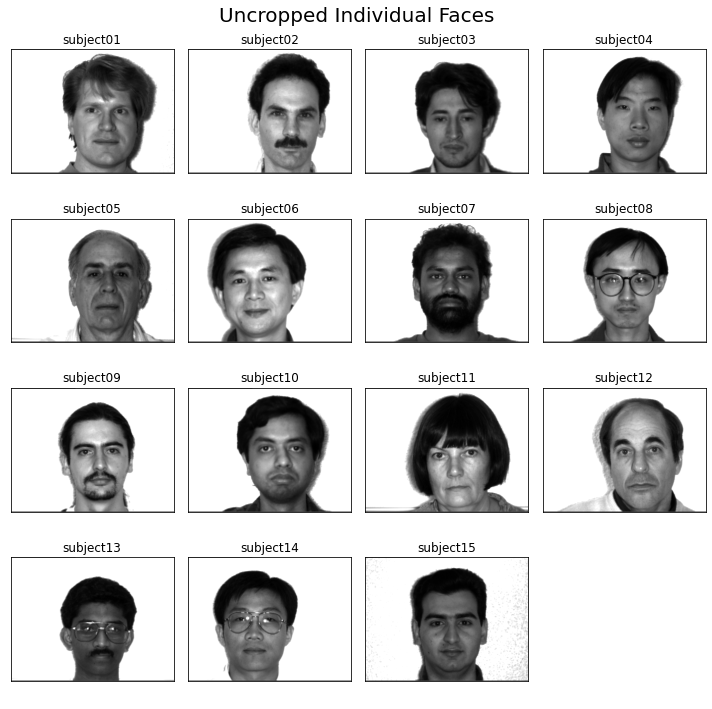

In [557]:
hw.plot_images_subset(image_arrays,
                       rows = 4,
                       columns = 4,
                       figsize= (10,10),
                       labels = list(Counter(subject_id).keys()))

plt.suptitle('Uncropped Individual Faces', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/uncropped_images.png');

## Plot different lighting conditions

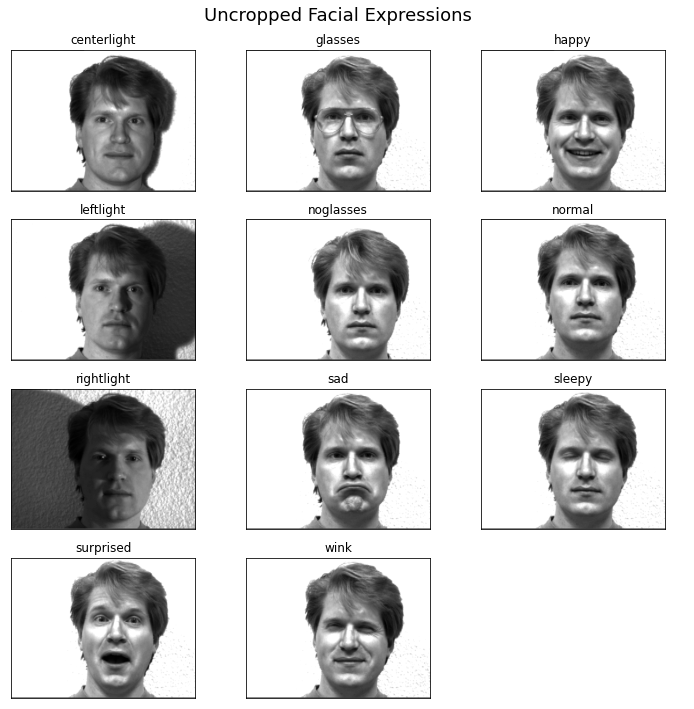

In [558]:
hw.plot_images_subset(uncropped.X[:11],
                       rows = 4,
                       columns = 3,
                       figsize= (10,10),
                       labels = list(Counter(conditions).keys()),
                      reshape = (uncropped.h,uncropped.w))

plt.suptitle('Uncropped Facial Expressions', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_facial_expressions.png');

## SVD

In [717]:
U,S,VT = np.linalg.svd(uncropped.X.T,full_matrices=0) 

## Modes necessary to explain 99% of data

In [718]:
var_explained = np.round(S**2/np.sum(S**2), decimals=100)
thresh = 0.99
cdf=np.cumsum(var_explained)
n_components = np.where(cdf>thresh)[0][0]
n_components

28

In [719]:
n_components / len(cdf)

0.1696969696969697

In [720]:
120 / len(cdf)

0.7272727272727273

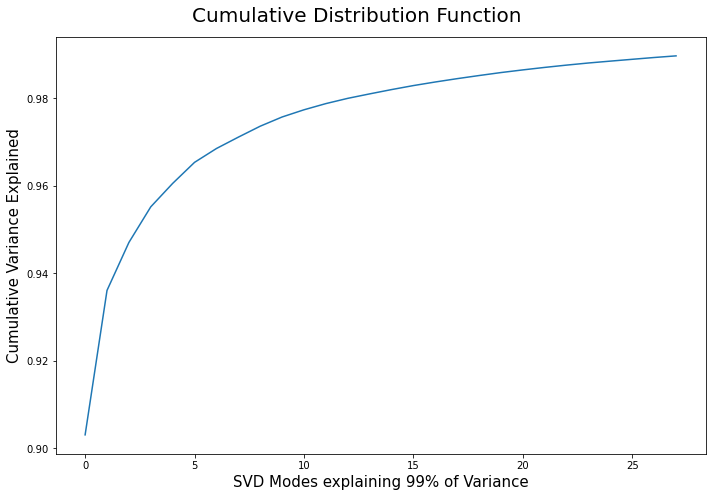

In [696]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.cumsum(var_explained[:n_components]))
ax.set_xlabel('SVD Modes explaining 99% of Variance', fontsize=15)
ax.set_ylabel('Cumulative Variance Explained', fontsize=15)
fig.suptitle('Cumulative Distribution Function', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_cdf_svd_modes.png');

In [697]:
var_explained = np.round(S**2/np.sum(S**2), decimals=2)
var_explained = var_explained[var_explained >= 0.01]

In [698]:
np.sum(var_explained)

0.9600000000000001

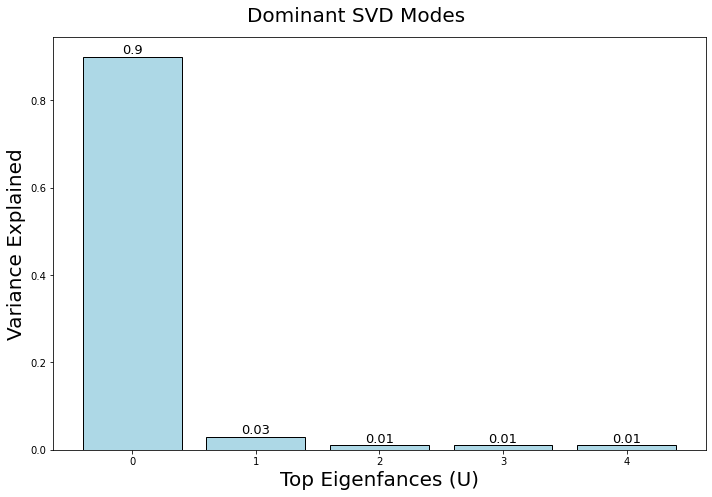

In [699]:
fig, ax = plt.subplots(figsize=(10,7))
bar_plot = ax.bar(np.arange(len(var_explained)), var_explained, color="lightblue", ec='k')

for p in bar_plot.patches:
    width = p.get_width()
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height()+0.001, 
            np.round(p.get_height(), 2), 
            fontsize=13, color='k', ha='center', va='bottom')
    
    
ax.set_xlabel('Top Eigenfances (U)', fontsize=20)
ax.set_ylabel('Variance Explained', fontsize=20)

fig.suptitle('Dominant SVD Modes', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_svd_modes.png');

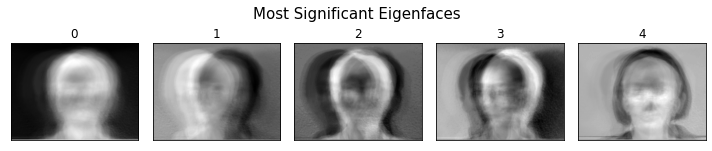

In [707]:
hw.plot_images_subset(U.T,
                      rows = 1,
                      columns = 5,
                      figsize= (10,7),
                      reshape = (uncropped.h,uncropped.w),
                      labels = np.arange(5))

plt.suptitle('Most Significant Eigenfaces', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.6)
plt.savefig('plots/exploration/uncropped_svd_eigenfaces.png');

In [701]:
step = np.arange(10,170,10)

In [702]:
stack = []
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ uncropped.X[:1].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)

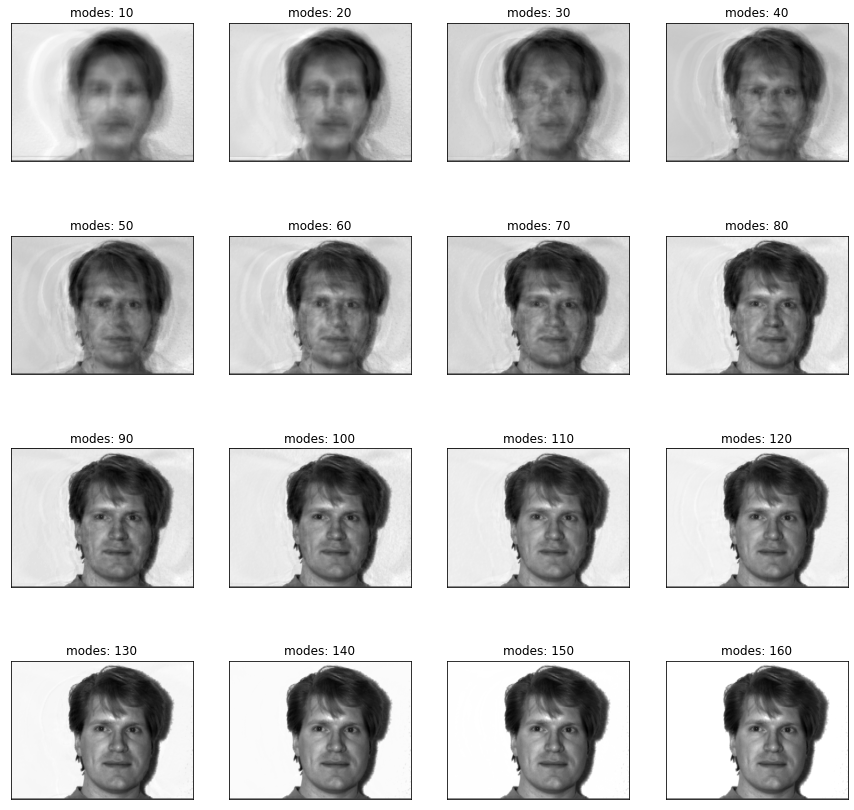

In [703]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (uncropped.h,uncropped.w),
                      labels = labels)

plt.savefig('plots/exploration/uncropped_svd_modes_1.png');

In [704]:
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ uncropped.X[:7].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)


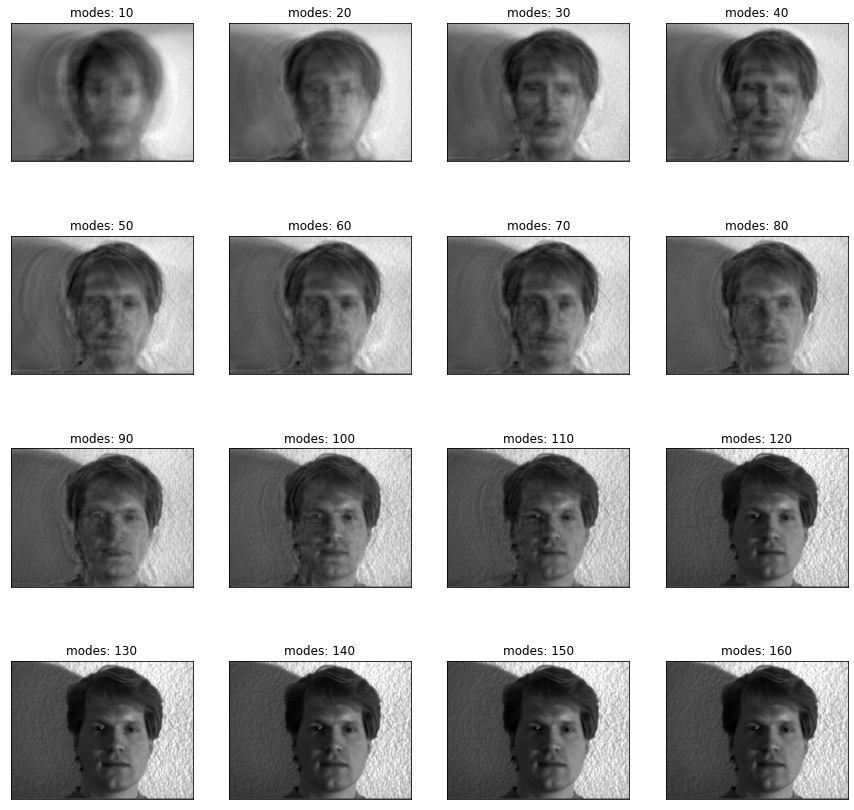

In [705]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (uncropped.h,uncropped.w),
                      labels = labels)

plt.savefig('plots/exploration/uncropped_svd_modes_2.png');